**Step 1 훈련 세트와 테스트 세트 만들기**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# CSV 파일 불러오기
data = pd.read_csv('waterQuality1.csv')

# 데이터 확인
print(data.head())

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [6]:
data.dropna(inplace=True)
print(data.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object


In [7]:
# type 변환
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')
print(data.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object


In [23]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# 특성과 타겟 변수 분리
X = data.drop('is_safe', axis=1)  # 'is_safe' 열 제외한 모든 열 -특성
y = data['is_safe']              # 'is_safe' 타겟 변수

# 훈련 세트, 테스트 세트 분할 (80-20 비율 사용)
# random_state = 42 : 랜덤 시드 설정 (이 시드를 사용하여 데이터 분할 시, 동일한 코드를 다시 실행할 때마다 동일한 분할 결과 얻을 수 있음)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((6396, 20), (1600, 20), (6396,), (1600,))

In [24]:
# 데이터 피처들의 기초 통계량 계산
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.00000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.668593,14.288814,0.162646,1.570011,0.043984,2.184350,0.249641,0.814757,0.774053,0.39656,...,0.099444,9.820491,1.332688,0.005425,16.472047,2.925532,0.052204,0.150273,0.048387,0.114057
std,1.264224,8.870305,0.251997,1.214557,0.035275,2.562158,0.268898,0.647695,0.433273,0.26538,...,0.058158,5.540888,0.570183,0.002739,17.683997,2.318789,0.026403,0.141687,0.023748,0.317900
min,0.010000,-0.080000,0.001000,0.010000,0.001000,0.010000,0.010000,0.010000,0.010000,0.01000,...,0.001000,0.010000,0.010000,0.001000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000
25%,0.040000,6.597500,0.030000,0.560000,0.009000,0.100000,0.050000,0.100000,0.420000,0.22000,...,0.048000,5.000000,1.000000,0.003000,2.190000,0.820000,0.030000,0.050000,0.030000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.22000,...,0.102000,9.930000,1.420000,0.005000,7.747500,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.61000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.00000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


**Step 2 데이터 탐색 및 시각화**

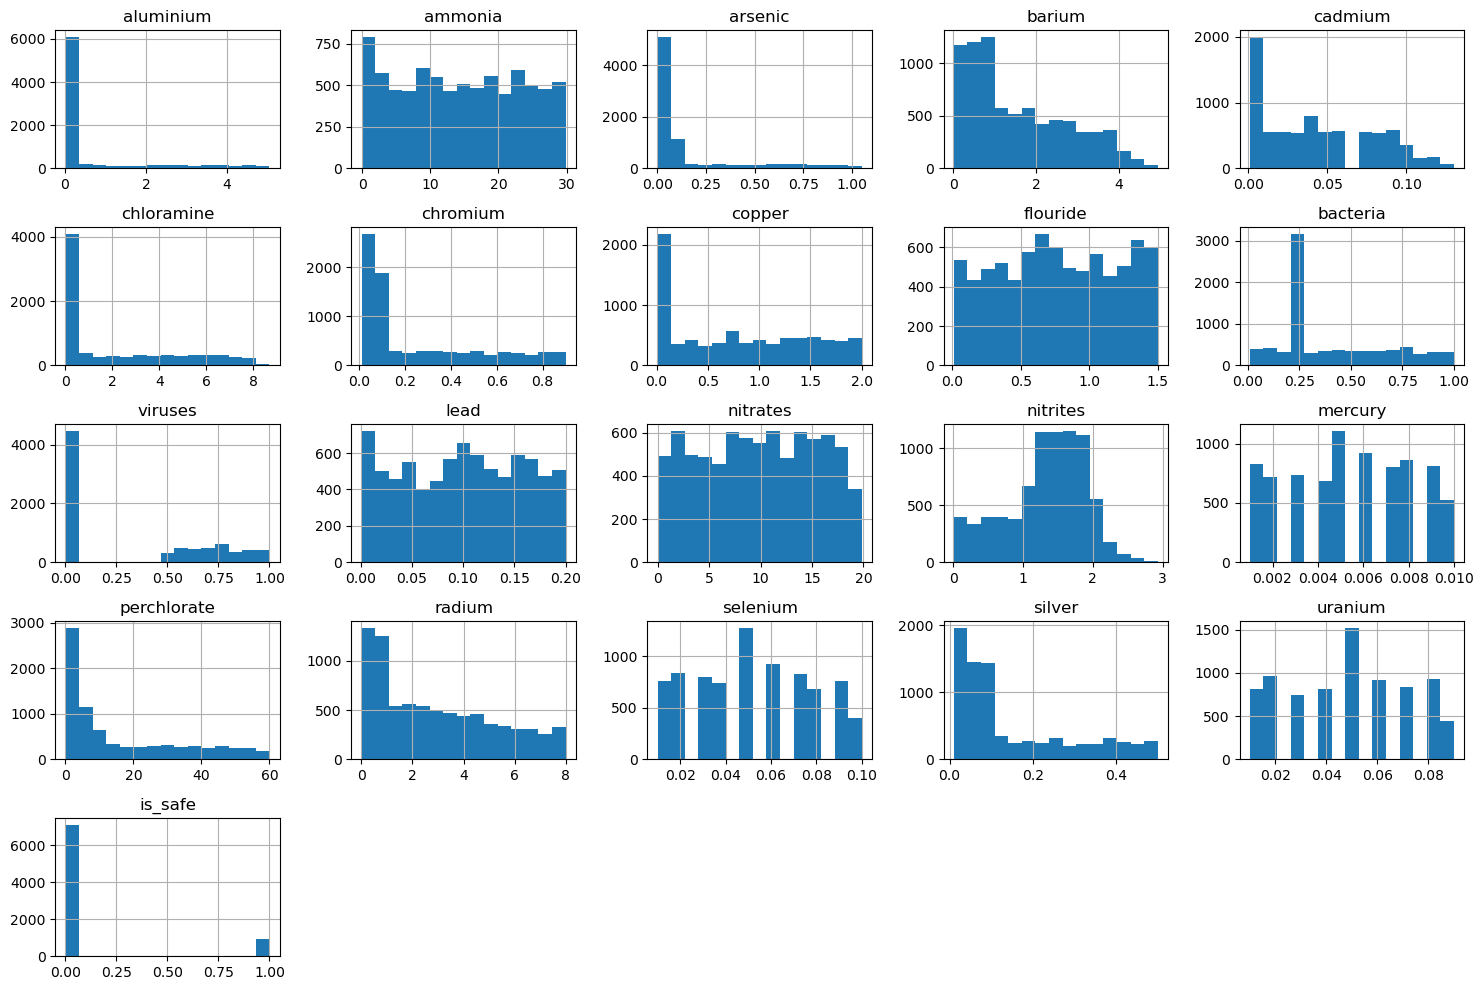

In [25]:
# 히스토그램 시각화
def plot_histograms(dataframe):
    dataframe.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
    
plot_histograms(data)

<Figure size 1500x1000 with 0 Axes>

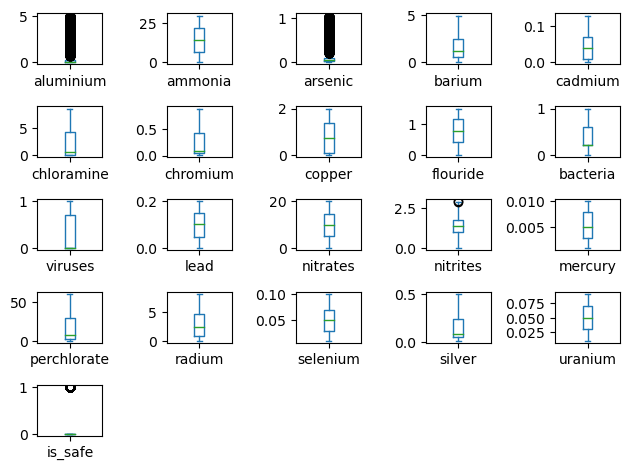

In [26]:
# 상자 그림(Box Plot) 시각화
def plot_boxplots(dataframe):
    plt.figure(figsize=(15, 10))
    dataframe.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()

plot_boxplots(data)

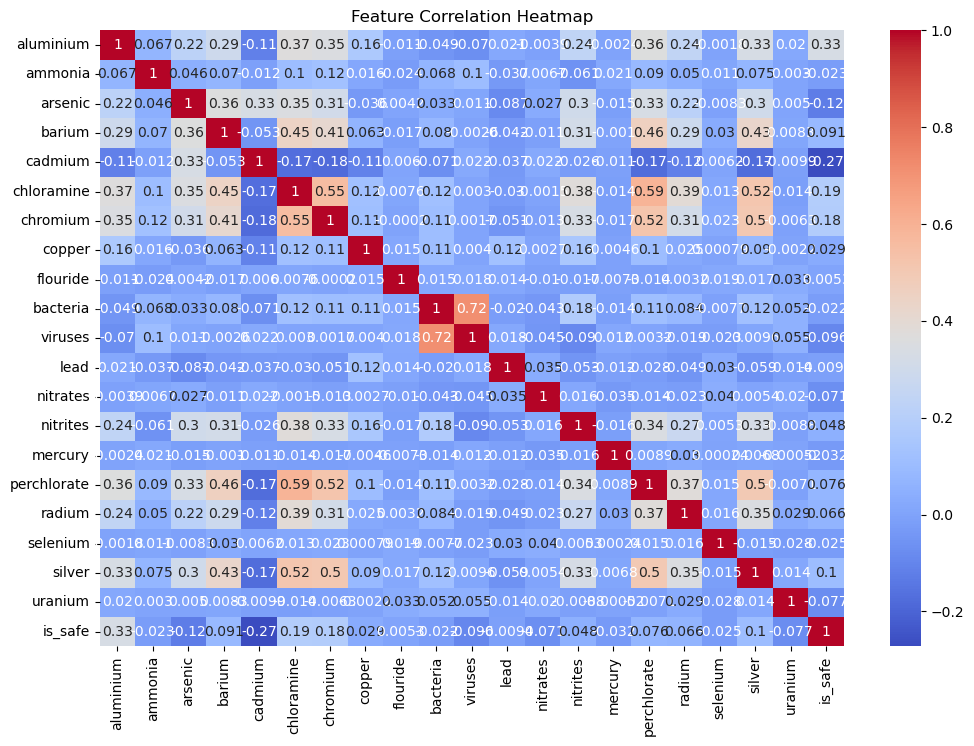

In [27]:
# 피처 간 상관 관계 시각화 (히트맵)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Step 3 데이터 전처리**

In [28]:
# 결측치 없음
# 범주형 데이터 없음

# 이상치 확인
print(data)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.05    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.05    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.040        2.00      0.09   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

In [29]:
# 아무리 정화를 잘해도 물에 각 성분이 0이기는 어려움
# 0인 값을 이상치로 분류하고 중간값으로 정제
# is_safe는 0과 1로 이루어져 있는 데이터이므로 건드리지 않음
data.iloc[:, :-1] = data.iloc[:, :-1].replace(0, data.iloc[:, :-1].median())

In [30]:
# 이상치 처리 결과
# 0값이 중간값으로 변경됨
print(data)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.05    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.05    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.040        2.00      0.09   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

In [31]:
# true와 false 값으로 이루어진 is_safe를 제외한 피처들이 저장된 데이터 프레임 생성
# 숫자형 데이터만 가공하기 위함
num_features = data.drop('is_safe', axis=1)

**Step 4 데이터 스케일링**

In [32]:
#편향된 피처 리스트
skewed_features = ['aluminium', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'bacteria', 'viruses', 'perchlorate', 'radium', 'silver']

# 편향된 피처를 로그 변환하는 사용자 정의 변환기
def apply_log_transform(df, feature_list):
    for feature in feature_list:
        df[feature] = np.log(df[feature])

# 로그 변환 적용
apply_log_transform(num_features, skewed_features)

In [33]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 적용하여 균일한 분포로 변환
# 균일한 분포는 서로 다른 스케일을 가진 피처들을 균일한 척도로 비교할 수 있게끔 함
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(num_features)

# 스케일러가 적용된 값으로 num_features 초기화
num_features = pd.DataFrame(scaled_features, columns=num_features.columns)

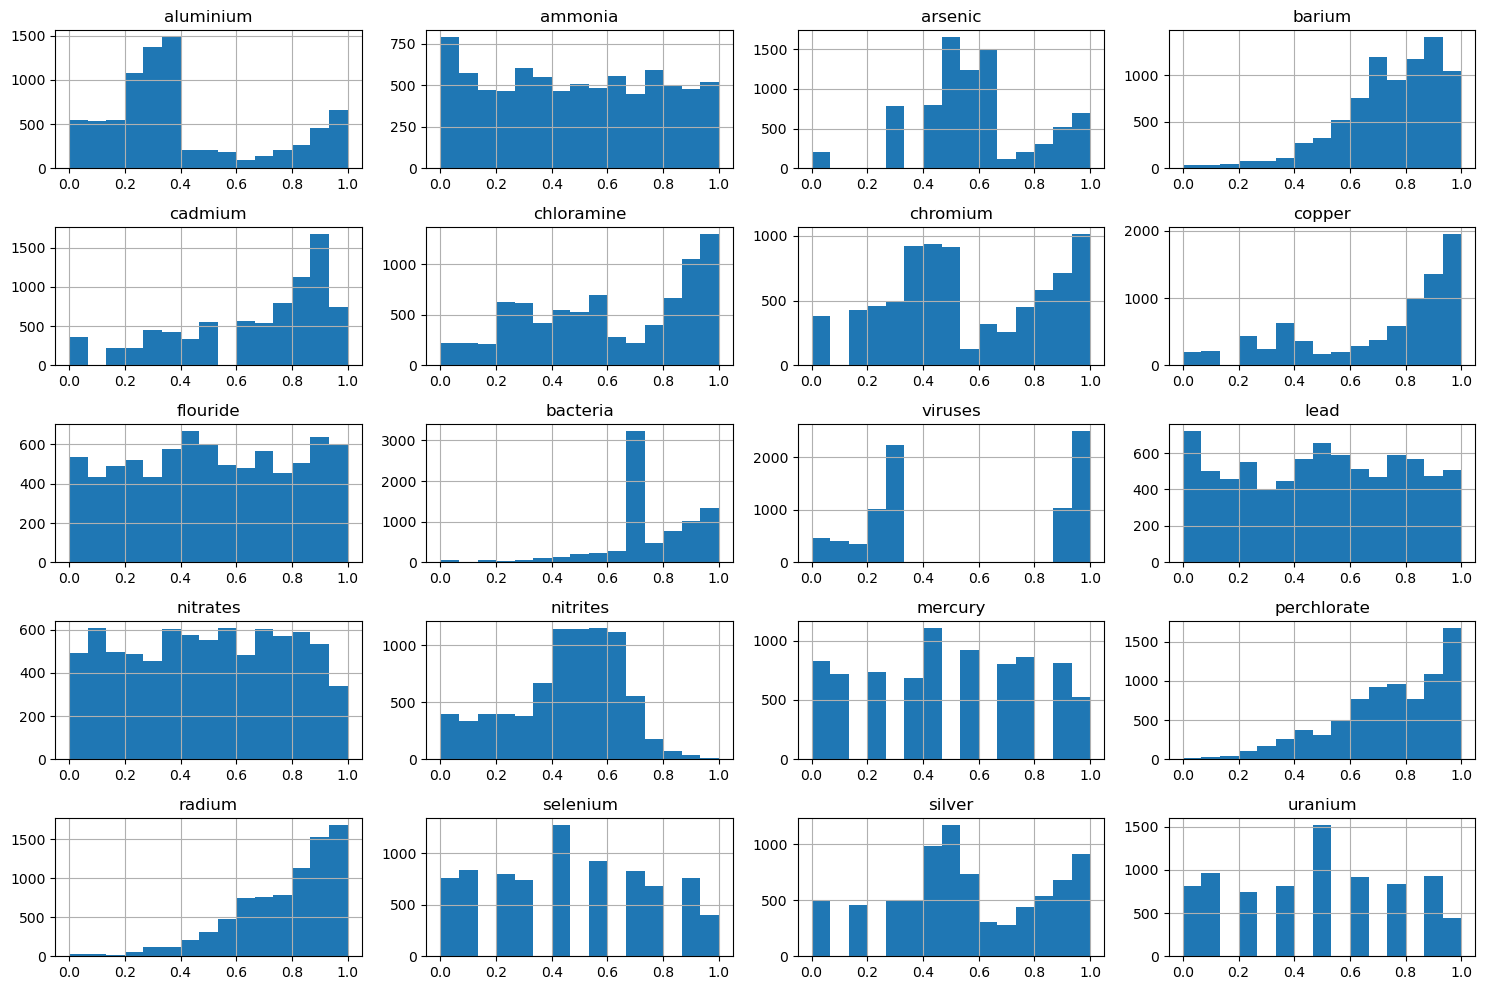

In [34]:
plot_histograms(num_features)

**Step 5 파이프라인 구성**

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

# 이상치 처리를 위한 사용자 정의 변환기
class ZeroToMedianTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.medians = pd.DataFrame([X.median()]).iloc[0]
        return self
    
    def transform(self, X, y=None):
        return X.replace(0, self.medians)

In [36]:
#로그 변환을 위한 함수
def log_transform(x):
    return np.log(x + 1)  # log(0)을 방지하기 위해 1을 더함

#로그 변환 적용을 위한 변환기
log_transformer = FunctionTransformer(log_transform, validate=False)

minmax_scaler = MinMaxScaler()

In [37]:
# 전체 피처에 대한 파이프라인 동작 구조
# 각각의 변환기를 적절한 피처에 적용. 이상치 처리, 로그 변환, 스케일링이 각각의 피처에 적용됨
preprocessing_pipeline = ColumnTransformer([
    ('zero_to_median', ZeroToMedianTransformer(), num_features.columns),
    ('log_transform', log_transformer, skewed_features),
    ('minmax_scaler', minmax_scaler, num_features.columns)
], remainder='passthrough')

integrated_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline)
])

# 파이프라인 구조 출력
integrated_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('zero_to_median',
                                                  ZeroToMedianTransformer(),
                                                  Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      d...
                                                   'chloramine', 'chromium',
                                                   'copper', 'bacteria',
                                                   'viruses', 'perchlorate',
                                                   'radium', 'silver']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
          

In [41]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, accuracy_score, precision_score, recall_score, f1_score

def test_model(yTest, yPred):
    mse = mean_squared_error(yTest, yPred)
    print(f'평균 제곱 오차 (MSE): {mse}')

    rmse = mean_squared_error(yTest, yPred, squared=False)
    print(f'평균 제곱근 오차 (RMSE): {rmse}')


    accuracy = accuracy_score(yTest, yPred)
    print(f'정확도: {accuracy}')


    precision = precision_score(yTest, yPred)
    print(f'정밀도: {precision}')

    
    recall = recall_score(yTest, yPred)
    print(f'재현율: {recall}')


    f1 = f1_score(yTest, yPred)
    print(f'F1 스코어: {f1}')

In [51]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_calssifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier())
])

rand_forest_calssifier.fit(X_train, y_train)

# Predictions
y_pred = rand_forest_calssifier.predict(X_test)

test_model(y_test, y_pred)

평균 제곱 오차 (MSE): 0.040625
평균 제곱근 오차 (RMSE): 0.20155644370746376
정확도: 0.959375
정밀도: 0.9470198675496688
재현율: 0.715
F1 스코어: 0.8148148148148147


In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', AdaBoostClassifier())
])

ada_boost_classifier.fit(X_train, y_train)

# Predictions
y_pred = ada_boost_classifier.predict(X_test)

test_model(y_test, y_pred)

평균 제곱 오차 (MSE): 0.074375
평균 제곱근 오차 (RMSE): 0.27271780286589287
정확도: 0.925625
정밀도: 0.813953488372093
재현율: 0.525
F1 스코어: 0.6382978723404256


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', GradientBoostingClassifier())
])

gradient_boosting_classifier.fit(X_train, y_train)

# Predictions
y_pred = gradient_boosting_classifier.predict(X_test)

test_model(y_test, y_pred)

평균 제곱 오차 (MSE): 0.045
평균 제곱근 오차 (RMSE): 0.21213203435596426
정확도: 0.955
정밀도: 0.9210526315789473
재현율: 0.7
F1 스코어: 0.7954545454545453


In [45]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', GaussianNB())
])

naive_bayes_classifier.fit(X_train, y_train)

# Predictions
y_pred = naive_bayes_classifier.predict(X_test)

test_model(y_test, y_pred)

평균 제곱 오차 (MSE): 0.2075
평균 제곱근 오차 (RMSE): 0.45552167895721496
정확도: 0.7925
정밀도: 0.3443396226415094
재현율: 0.73
F1 스코어: 0.46794871794871795


In [54]:
from sklearn.tree import DecisionTreeClassifier

decison_tree_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', DecisionTreeClassifier())
])

decison_tree_classifier.fit(X_train, y_train)

# Predictions
y_pred = decison_tree_classifier.predict(X_test)

test_model(y_test, y_pred)

평균 제곱 오차 (MSE): 0.05625
평균 제곱근 오차 (RMSE): 0.23717082451262844
정확도: 0.94375
정밀도: 0.7696078431372549
재현율: 0.785
F1 스코어: 0.7772277227722774
